Kaggle Competition -- Otto Group Product Classification
==========

[Link to description page here](https://www.kaggle.com/c/otto-group-product-classification-challenge)

Read data from training file
-------

In [1]:
data.location <- '/Users/bshur/School/Extras/Data/'
data.train <- read.csv(paste0(data.location,'otto_train.csv'))
data.test <- read.csv(paste0(data.location,'otto_test.csv'))

Explore the data
------

In [2]:
nrow(data.train); ncol(data.train)

[1] 61878

[1] 95

In [3]:
names(data.train)

[1] "id"      "feat_1"  "feat_2"  "feat_3"  "feat_4"  "feat_5"  "feat_6" 
 [8] "feat_7"  "feat_8"  "feat_9"  "feat_10" "feat_11" "feat_12" "feat_13"
[15] "feat_14" "feat_15" "feat_16" "feat_17" "feat_18" "feat_19" "feat_20"
[22] "feat_21" "feat_22" "feat_23" "feat_24" "feat_25" "feat_26" "feat_27"
[29] "feat_28" "feat_29" "feat_30" "feat_31" "feat_32" "feat_33" "feat_34"
[36] "feat_35" "feat_36" "feat_37" "feat_38" "feat_39" "feat_40" "feat_41"
[43] "feat_42" "feat_43" "feat_44" "feat_45" "feat_46" "feat_47" "feat_48"
[50] "feat_49" "feat_50" "feat_51" "feat_52" "feat_53" "feat_54" "feat_55"
[57] "feat_56" "feat_57" "feat_58" "feat_59" "feat_60" "feat_61" "feat_62"
[64] "feat_63" "feat_64" "feat_65" "feat_66" "feat_67" "feat_68" "feat_69"
[71] "feat_70" "feat_71" "feat_72" "feat_73" "feat_74" "feat_75" "feat_76"
[78] "feat_77" "feat_78" "feat_79" "feat_80" "feat_81" "feat_82" "feat_83"
[85] "feat_84" "feat_85" "feat_86" "feat_87" "feat_88" "feat_89" "feat_90"
[92] "feat_91" "feat_92" "feat_93" "target"

In [4]:
get_features <- function(data,i_to_n=1:10) {
    features <- paste0('feat_',i_to_n)
    return(data[,c('id','target',features)])
}
get_features(data.train)[0:10,]

,id,target,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10
1,1,Class_1,1,0,0,0,0,0,0,0,0,0
2,2,Class_1,0,0,0,0,0,0,0,1,0,0
3,3,Class_1,0,0,0,0,0,0,0,1,0,0
4,4,Class_1,1,0,0,1,6,1,5,0,0,1
5,5,Class_1,0,0,0,0,0,0,0,0,0,0
6,6,Class_1,2,1,0,0,7,0,0,0,0,0
7,7,Class_1,2,0,0,0,0,0,0,2,0,1
8,8,Class_1,0,0,0,0,0,0,0,0,0,0
9,9,Class_1,0,0,0,0,0,0,0,4,0,0
10,10,Class_1,0,0,0,0,0,0,1,0,0,0


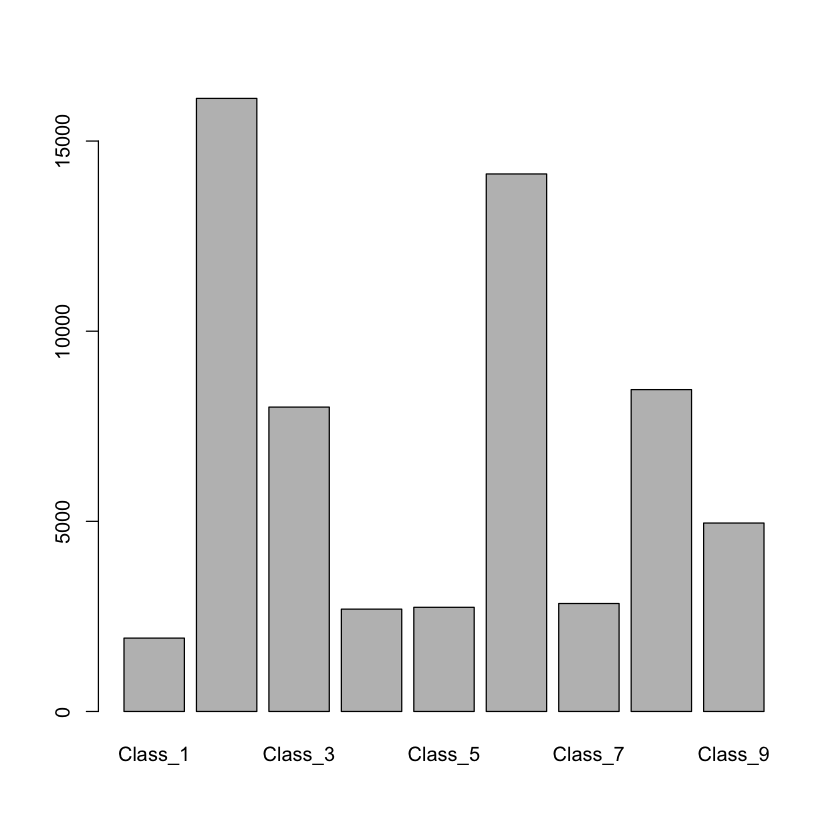

In [5]:
barplot(with(data.train
     ,table(target)
))

In [6]:
library(reshape2)

In [7]:
data.subset <- get_features(data.train)[,-1]

In [8]:
m <- melt(data.subset,id='target')
dcast(m, target~variable, max)

Warning message:
In .fun(.value[0], ...): no non-missing arguments to max; returning -Inf

,target,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10
1,Class_1,25,10,7,5,19,5,19,56,7,26
2,Class_2,22,5,6,7,13,3,9,14,41,24
3,Class_3,22,7,5,5,4,3,7,13,43,22
4,Class_4,30,2,5,9,5,2,2,6,20,30
5,Class_5,3,2,4,5,2,1,1,6,15,4
6,Class_6,11,26,64,67,12,10,9,21,18,12
7,Class_7,13,39,10,10,5,3,15,22,17,30
8,Class_8,61,51,44,70,11,8,38,23,29,22
9,Class_9,13,5,6,11,6,3,8,76,15,22


In [9]:
d1 <- dcast(m, target~variable, length )
d2 <- dcast(m, target~variable, function(x) { sum(x==0, na.rm=T) })

In [10]:
(d1 - d2)[,-1]

Warning message:
In Ops.factor(left, right): ‘-’ not meaningful for factors

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10
1,445,186,251,219,203,108,427,1017,242,403
2,2797,189,1072,1135,378,162,306,2421,3537,939
3,1040,171,606,667,256,67,263,1283,2357,839
4,384,31,188,212,99,29,84,495,133,319
5,61,48,112,137,138,15,10,1085,202,48
6,1816,2777,7553,8012,600,230,1258,2517,2195,2060
7,511,333,424,562,113,95,596,856,648,694
8,1770,2788,1552,1747,859,396,2181,3633,1885,1732
9,1571,337,825,739,325,66,310,3259,843,649


In [11]:
d3 <- dcast(m, target~., length)
d3

,target,.
1,Class_1,19290
2,Class_2,161220
3,Class_3,80040
4,Class_4,26910
5,Class_5,27390
6,Class_6,141350
7,Class_7,28390
8,Class_8,84640
9,Class_9,49550


Create randomForest model
-------

In [12]:
library(randomForest)
library(foreach)
library(doParallel)
registerDoParallel(cores=2)

randomForest 4.6-10
Type rfNews() to see new features/changes/bug fixes.
Loading required package: iterators
Loading required package: parallel


Since there are minimal records among some feature+class combinations, will bootstrap more records in each class.

In [13]:
i <- 100000
classes <- levels(data.train$target)
k <- length(classes)

In [14]:
foreach (z=1:k, .combine='cbind') %dopar% {
    s <- sample(data.train[data.train$target==classes[z],'id'], size=i, replace=TRUE)
} -> results

In [15]:
head(results); nrow(results)

result.1,result.2,result.3,result.4,result.5,result.6,result.7,result.8,result.9
553,7669,19959,28375,29202,43937,47782,49451,59016
1024,17136,24139,26646,30922,36315,48268,54829,61648
341,2355,19604,27430,31167,41633,48175,49920,56966
1488,17940,18818,27079,30625,44394,45852,56026,57671
1033,4344,25048,26790,30907,37841,46339,52578,58945
1909,10347,19150,27130,29825,40955,47963,48844,57520


[1] 10000

In [16]:
data.train.sample <- data.frame()
for (i in 1:9) {
    data.train.sample <- rbind(data.train.sample, data.frame('sample'=results[,i]))
}

In [17]:
nrow(data.train.sample); head(data.train.sample)

[1] 90000

,sample
1,553
2,1024
3,341
4,1488
5,1033
6,1909


In [28]:
data.train.resampled <- data.train[data.train.sample[,1],-1]

In [29]:
nrow(data.train.resampled); head(data.train.resampled)

[1] 90000

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
553,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,3,0,1,0,1,0,2,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,7,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,10,0,0,0,0,0,1,5,0,0,2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,Class_1
1024,0,0,0,0,0,0,0,3,1,0,0,0,0,1,0,0,3,2,0,0,0,0,0,6,1,0,0,0,0,0,0,3,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,3,1,0,14,0,0,3,2,2,0,0,0,0,1,3,1,0,0,0,0,0,2,0,5,1,0,0,0,0,0,Class_1
341,0,0,0,0,0,0,1,0,0,2,0,0,0,1,0,0,0,0,0,1,0,1,0,3,0,0,0,0,0,0,1,0,0,0,1,1,0,0,4,0,0,0,0,2,0,0,0,2,0,3,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,10,0,1,5,0,0,0,0,1,0,0,0,4,0,1,0,0,0,1,0,1,0,0,0,1,0,0,Class_1
1488,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
1033,1,0,0,1,0,0,0,0,0,5,1,0,2,0,0,1,36,4,0,0,0,3,0,8,1,0,0,0,2,0,0,1,0,1,0,11,1,0,2,0,1,0,0,0,0,0,0,11,0,1,0,0,0,2,1,0,2,1,0,3,0,0,0,0,1,1,18,3,0,7,4,1,0,0,0,0,0,0,1,0,3,1,0,0,0,0,2,0,0,0,2,0,0,Class_1
1909,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0,0,0,0,0,2,0,3,2,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,6,0,0,0,0,28,1,7,0,0,0,1,0,0,5,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Class_1


In [31]:
f <- randomForest(
    target~.
    ,data=data.train.resampled
    ,ntree=500
)

Save model for later
-------

In [ ]:
saveRDS(paste0(data.location,'otto_model.robj'))

Test predictions
----

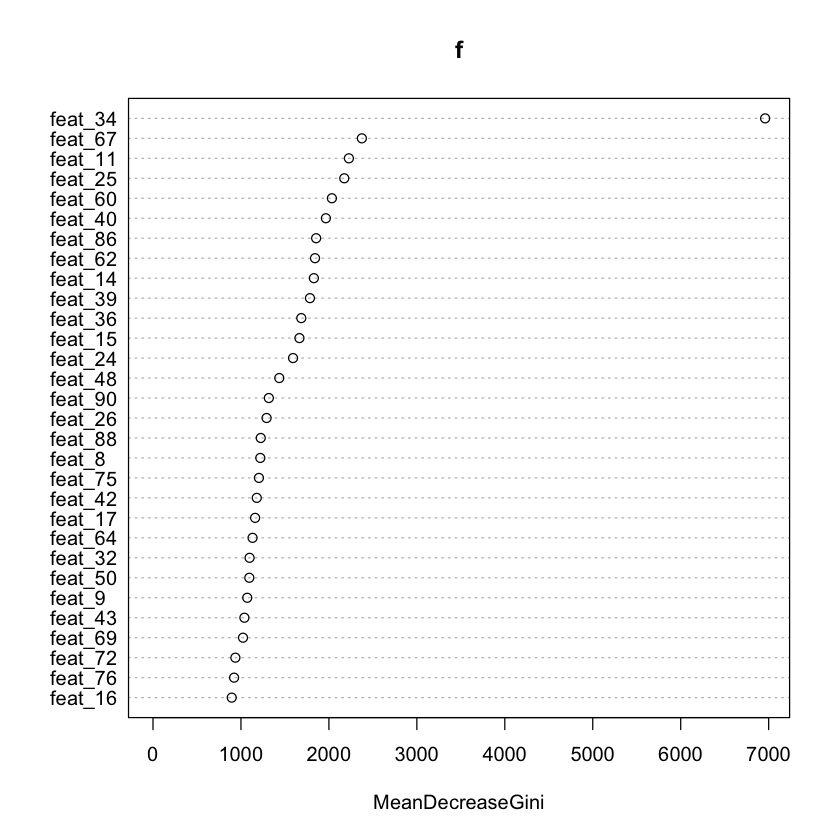

In [32]:
varImpPlot(f)

In [33]:
p <- predict(f,data.train)

In [34]:
t <- data.train[,'target']

In [41]:
conf <- data.frame('predict'=p,'class'=t)
round(prop.table(table(conf),2)*100,2)

         class
predict   Class_1 Class_2 Class_3 Class_4 Class_5 Class_6 Class_7 Class_8
  Class_1   99.43    0.06    0.00    0.00    0.00    0.48    0.11    0.63
  Class_2    0.00   85.54    7.63    0.30    0.04    0.30    0.18    0.21
  Class_3    0.05   11.07   89.68    0.67    0.00    0.08    0.18    0.18
  Class_4    0.00    2.05    1.82   98.92    0.00    0.21    0.11    0.01
  Class_5    0.00    0.20    0.00    0.00   99.93    0.02    0.04    0.04
  Class_6    0.05    0.06    0.02    0.04    0.00   95.91    0.07    0.56
  Class_7    0.05    0.75    0.74    0.07    0.04    1.15   99.19    0.31
  Class_8    0.21    0.11    0.05    0.00    0.00    1.08    0.11   97.42
  Class_9    0.21    0.19    0.05    0.00    0.00    0.79    0.04    0.65
         class
predict   Class_9
  Class_1    0.65
  Class_2    0.20
  Class_3    0.02
  Class_4    0.00
  Class_5    0.02
  Class_6    0.26
  Class_7    0.20
  Class_8    0.36
  Class_9   98.28

In [36]:
table(p); table(t)

p
Class_1 Class_2 Class_3 Class_4 Class_5 Class_6 Class_7 Class_8 Class_9 
   2083   14485    9013    3171    2777   13632    3198    8444    5075 

t
Class_1 Class_2 Class_3 Class_4 Class_5 Class_6 Class_7 Class_8 Class_9 
   1929   16122    8004    2691    2739   14135    2839    8464    4955 